In [1]:
import pandas as pd
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import plotly.express as px
from IPython.display import HTML, Image
import utils_profe
from collections import Counter
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr

path = '../../data/Automobile_data.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
print(df.shape)
df.info()

(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size     

## Limpieza de datos con Python:

### **Verificación y ajuste de tipos de datos** 

Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [2]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
symboling,3,3,1,2,2,2,1,1,1,0
normalized-losses,?,?,?,164,164,?,158,?,158,?
make,alfa-romero,alfa-romero,alfa-romero,audi,audi,audi,audi,audi,audi,audi
fuel-type,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo
num-of-doors,two,two,two,four,four,two,four,four,four,two
body-style,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback
drive-wheels,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd
engine-location,front,front,front,front,front,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
# Detectar columnas con valores únicos ['Yes', 'No']
yes_no_columns = [col for col in df.columns if sorted(df[col].dropna().unique()) == ['No', 'Yes']]
print("Columnas con valores 'Yes' y 'No':", yes_no_columns)
# Aplicar el mapeo 'Yes' -> 1 y 'No' -> 0 a todas las columnas de una vez usando map y itertools
df[yes_no_columns] = pd.DataFrame(
    map(lambda col: df[col].map({'Yes': 1, 'No': 0}), yes_no_columns)
).T.set_axis(yes_no_columns, axis=1)

Columnas con valores 'Yes' y 'No': []


In [5]:
utils_profe.generar_diccionario(df)

data_dict = {
    'symboling': 'int64',
    'normalized-losses': 'object',
    'make': 'object',
    'fuel-type': 'object',
    'aspiration': 'object',
    'num-of-doors': 'object',
    'body-style': 'object',
    'drive-wheels': 'object',
    'engine-location': 'object',
    'wheel-base': 'float64',
    'length': 'float64',
    'width': 'float64',
    'height': 'float64',
    'curb-weight': 'int64',
    'engine-type': 'object',
    'num-of-cylinders': 'object',
    'engine-size': 'int64',
    'fuel-system': 'object',
    'bore': 'object',
    'stroke': 'object',
    'compression-ratio': 'float64',
    'horsepower': 'object',
    'peak-rpm': 'object',
    'city-mpg': 'int64',
    'highway-mpg': 'int64',
    'price': 'object',
}


In [6]:
# Conertir a los tipos de datos correspondientes segun la info del ds
data_dict = {
    'symboling': 'int64',
    'normalized-losses': 'int64',
    'make': 'str',
    'fuel-type': 'category',
    'aspiration': 'category',
    'num-of-doors': 'category',
    'body-style': 'category',
    'drive-wheels': 'category',
    'engine-location': 'category',
    'wheel-base': 'float64',
    'length': 'float64',
    'width': 'float64',
    'height': 'float64',
    'curb-weight': 'int64',
    'engine-type': 'category',
    'num-of-cylinders': 'category',
    'engine-size': 'int64',
    'fuel-system': 'category',
    'bore': 'float64',
    'stroke': 'float64',
    'compression-ratio': 'float64',
    'horsepower': 'float64',
    'peak-rpm': 'int64',
    'city-mpg': 'int64',
    'highway-mpg': 'int64',
    'price': 'float64',
}

# Convertir tipos de datos según el diccionario
for column, dtype in data_dict.items():
    df[column] = df[column].astype(dtype, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          205 non-null    int64   
 1   normalized-losses  205 non-null    object  
 2   make               205 non-null    object  
 3   fuel-type          205 non-null    category
 4   aspiration         205 non-null    category
 5   num-of-doors       205 non-null    category
 6   body-style         205 non-null    category
 7   drive-wheels       205 non-null    category
 8   engine-location    205 non-null    category
 9   wheel-base         205 non-null    float64 
 10  length             205 non-null    float64 
 11  width              205 non-null    float64 
 12  height             205 non-null    float64 
 13  curb-weight        205 non-null    int64   
 14  engine-type        205 non-null    category
 15  num-of-cylinders   205 non-null    category
 16  engine-s

In [7]:
# Ver cuales quedaron como object
# Mostrar las columnas tipo 'object'
columnas_object = df.select_dtypes(include='object').columns
print("Columnas de tipo 'object':")
print(columnas_object)

Columnas de tipo 'object':
Index(['normalized-losses', 'make', 'bore', 'stroke', 'horsepower', 'peak-rpm',
       'price'],
      dtype='object')


In [8]:
#Empezamos con 'normalized-losses'
# La columna normalized-losses debe ser numerico pero figura como Object debido a que tiene ?
# Concepto: representa una medida normalizada de las pérdidas asociadas con seguros de automóviles. Se refiere a la cantidad estimada 
# de dinero perdido debido a siniestros en comparación con el valor del vehículo. Esta métrica ayuda a evaluar el riesgo asociado a 
# un automóvil en términos de costos de reparación o reemplazo tras un accidente. Los valores más altos indican mayores pérdidas 
# relativas, mientras que los valores bajos sugieren menores costos en situaciones de siniestro.(chatgpt)
columna = 'normalized-losses'
df[columna].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [9]:
utils_profe.forzar_2_numero(df,columna,'?')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          205 non-null    int64   
 1   normalized-losses  164 non-null    float64 
 2   make               205 non-null    object  
 3   fuel-type          205 non-null    category
 4   aspiration         205 non-null    category
 5   num-of-doors       205 non-null    category
 6   body-style         205 non-null    category
 7   drive-wheels       205 non-null    category
 8   engine-location    205 non-null    category
 9   wheel-base         205 non-null    float64 
 10  length             205 non-null    float64 
 11  width              205 non-null    float64 
 12  height             205 non-null    float64 
 13  curb-weight        205 non-null    int64   
 14  engine-type        205 non-null    category
 15  num-of-cylinders   205 non-null    category
 16  engine-s

In [10]:
#Columna 'bore'
# el término bore se refiere al diámetro interno de los cilindros en el motor del automóvil. Es un valor importante en la 
# ingeniería automotriz porque afecta la cantidad de aire y combustible que el motor puede quemar y, por lo tanto, influye 
# en el desempeño y potencia del motor.
columna = 'bore'
df[columna].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [11]:
utils_profe.forzar_2_numero(df,columna,'?')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          205 non-null    int64   
 1   normalized-losses  164 non-null    float64 
 2   make               205 non-null    object  
 3   fuel-type          205 non-null    category
 4   aspiration         205 non-null    category
 5   num-of-doors       205 non-null    category
 6   body-style         205 non-null    category
 7   drive-wheels       205 non-null    category
 8   engine-location    205 non-null    category
 9   wheel-base         205 non-null    float64 
 10  length             205 non-null    float64 
 11  width              205 non-null    float64 
 12  height             205 non-null    float64 
 13  curb-weight        205 non-null    int64   
 14  engine-type        205 non-null    category
 15  num-of-cylinders   205 non-null    category
 16  engine-s

In [12]:
#Columna 'stroke'
# el término bore se refiere al diámetro interno de los cilindros en el motor del automóvil. Es un valor importante en la 
# ingeniería automotriz porque afecta la cantidad de aire y combustible que el motor puede quemar y, por lo tanto, influye 
# en el desempeño y potencia del motor.
columna = 'stroke'
df[columna].unique()

array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36', '2.64',
       '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [13]:
utils_profe.forzar_2_numero(df,columna,'?')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          205 non-null    int64   
 1   normalized-losses  164 non-null    float64 
 2   make               205 non-null    object  
 3   fuel-type          205 non-null    category
 4   aspiration         205 non-null    category
 5   num-of-doors       205 non-null    category
 6   body-style         205 non-null    category
 7   drive-wheels       205 non-null    category
 8   engine-location    205 non-null    category
 9   wheel-base         205 non-null    float64 
 10  length             205 non-null    float64 
 11  width              205 non-null    float64 
 12  height             205 non-null    float64 
 13  curb-weight        205 non-null    int64   
 14  engine-type        205 non-null    category
 15  num-of-cylinders   205 non-null    category
 16  engine-s

In [14]:
#Columna 'horsepower'
columna = 'horsepower'
df[columna].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [15]:
utils_profe.forzar_2_numero(df,columna,'?')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          205 non-null    int64   
 1   normalized-losses  164 non-null    float64 
 2   make               205 non-null    object  
 3   fuel-type          205 non-null    category
 4   aspiration         205 non-null    category
 5   num-of-doors       205 non-null    category
 6   body-style         205 non-null    category
 7   drive-wheels       205 non-null    category
 8   engine-location    205 non-null    category
 9   wheel-base         205 non-null    float64 
 10  length             205 non-null    float64 
 11  width              205 non-null    float64 
 12  height             205 non-null    float64 
 13  curb-weight        205 non-null    int64   
 14  engine-type        205 non-null    category
 15  num-of-cylinders   205 non-null    category
 16  engine-s

In [16]:
#Columna 'price'
columna = 'price'
df[columna].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [17]:
utils_profe.forzar_2_numero(df,columna,'?')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          205 non-null    int64   
 1   normalized-losses  164 non-null    float64 
 2   make               205 non-null    object  
 3   fuel-type          205 non-null    category
 4   aspiration         205 non-null    category
 5   num-of-doors       205 non-null    category
 6   body-style         205 non-null    category
 7   drive-wheels       205 non-null    category
 8   engine-location    205 non-null    category
 9   wheel-base         205 non-null    float64 
 10  length             205 non-null    float64 
 11  width              205 non-null    float64 
 12  height             205 non-null    float64 
 13  curb-weight        205 non-null    int64   
 14  engine-type        205 non-null    category
 15  num-of-cylinders   205 non-null    category
 16  engine-s

In [18]:
#Columna 'peak-rpm' 
# Se refiere a las revoluciones máximas por minuto (RPM) que el motor puede alcanzar de forma segura. 
# Es un indicador de la velocidad del motor y suele asociarse con el rendimiento de este. Un valor más alto de peak-rpm 
# implica que el motor puede girar más rápido antes de llegar al límite de seguridad, lo que puede indicar un diseño 
# orientado al desempeño.
columna = 'peak-rpm'
utils_profe.forzar_2_numero(df,columna,'?')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          205 non-null    int64   
 1   normalized-losses  164 non-null    float64 
 2   make               205 non-null    object  
 3   fuel-type          205 non-null    category
 4   aspiration         205 non-null    category
 5   num-of-doors       205 non-null    category
 6   body-style         205 non-null    category
 7   drive-wheels       205 non-null    category
 8   engine-location    205 non-null    category
 9   wheel-base         205 non-null    float64 
 10  length             205 non-null    float64 
 11  width              205 non-null    float64 
 12  height             205 non-null    float64 
 13  curb-weight        205 non-null    int64   
 14  engine-type        205 non-null    category
 15  num-of-cylinders   205 non-null    category
 16  engine-s

### **Detección y eliminación de valores duplicados** 

Asegúrate de que cada registro en el dataset sea único

In [19]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


### **Consistencia en valores categóricos**

Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’)

In [20]:
# Identificar columnas de tipo 'object', típicamente usadas para variables categóricas
categorical_columns = df.select_dtypes(include=['category','bool']).columns
# Crear un diccionario donde cada clave es el nombre de la columna y los valores son los valores únicos de esa columna
unique_values_dict = {col: df[col].unique() for col in categorical_columns}
# Convertir el diccionario en un DataFrame, rellenando con NaN cuando haya menos valores únicos
unique_values_df = pd.DataFrame.from_dict(unique_values_dict, orient='index').transpose()
# Mostrar el DataFrame resultante
unique_values_df.T

,0,1,2,3,4,5,6,7
fuel-type,gas,diesel,None,None,None,None,None,None
aspiration,std,turbo,None,None,None,None,None,None
num-of-doors,two,four,?,None,None,None,None,None
body-style,convertible,hatchback,sedan,wagon,hardtop,None,None,None
drive-wheels,rwd,fwd,4wd,None,None,None,None,None
engine-location,front,rear,None,None,None,None,None,None
engine-type,dohc,ohcv,ohc,l,rotor,ohcf,dohcv,None
num-of-cylinders,four,six,five,three,twelve,two,eight,None
fuel-system,mpfi,2bbl,mfi,1bbl,spfi,4bbl,idi,spdi


In [21]:
# La categorica 'num-of-doors'  tiene ?. Vamos a pasarla como null
columna = 'num-of-doors'
df[columna] = df[columna].replace('?', pd.NA)


C:\Users\edgar\AppData\Local\Temp\ipykernel_18724\1508792994.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[columna] = df[columna].replace('?', pd.NA)


### **Manejo de valores faltantes:**

Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato

In [22]:
utils_profe.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
normalized-losses,164,41,20.00
stroke,201,4,1.95
price,201,4,1.95
bore,201,4,1.95
horsepower,203,2,0.98
peak-rpm,203,2,0.98
num-of-doors,203,2,0.98
symboling,205,0,0.00
fuel-type,205,0,0.00
make,205,0,0.00


In [23]:
#
df['normalized-losses'].describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64

In [24]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[df['normalized-losses'].isna()].T

,0,1,2,5,7,9,14,15,16,17,...,127,128,129,130,131,181,189,191,192,193
symboling,3,3,1,2,1,0,1,0,0,0,...,3,3,1,0,2,-1,3,0,0,0
normalized-losses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
make,alfa-romero,alfa-romero,alfa-romero,audi,audi,audi,bmw,bmw,bmw,bmw,...,porsche,porsche,porsche,renault,renault,toyota,volkswagen,volkswagen,volkswagen,volkswagen
fuel-type,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas
aspiration,std,std,std,std,std,turbo,std,std,std,std,...,std,std,std,std,std,std,std,std,turbo,std
num-of-doors,two,two,two,two,four,two,four,four,two,four,...,two,two,two,four,two,four,two,four,four,four
body-style,convertible,convertible,hatchback,sedan,wagon,hatchback,sedan,sedan,sedan,sedan,...,hardtop,convertible,hatchback,wagon,hatchback,wagon,convertible,sedan,sedan,wagon
drive-wheels,rwd,rwd,rwd,fwd,fwd,4wd,rwd,rwd,rwd,rwd,...,rwd,rwd,rwd,fwd,fwd,rwd,fwd,fwd,fwd,fwd
engine-location,front,front,front,front,front,front,front,front,front,front,...,rear,rear,front,front,front,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,105.8,99.5,103.5,103.5,103.5,110.0,...,89.5,89.5,98.4,96.1,96.1,104.5,94.5,100.4,100.4,100.4


In [25]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['normalized-losses'] = imputer.fit_transform(df[['normalized-losses']])


In [26]:
imputer = KNNImputer(n_neighbors=5)
df['bore'] = imputer.fit_transform(df[['bore']])

In [27]:
imputer = KNNImputer(n_neighbors=5)
df['stroke'] = imputer.fit_transform(df[['stroke']])

In [28]:
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)


C:\Users\edgar\AppData\Local\Temp\ipykernel_18724\4101575265.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)


In [29]:
imputer = KNNImputer(n_neighbors=5)
df['horsepower'] = imputer.fit_transform(df[['horsepower']])

In [30]:
imputer = KNNImputer(n_neighbors=5)
df['peak-rpm'] = imputer.fit_transform(df[['peak-rpm']])

In [31]:
imputer = KNNImputer(n_neighbors=5)
df['price'] = imputer.fit_transform(df[['price']])


In [32]:
utils_profe.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
symboling,205,0,0.0
normalized-losses,205,0,0.0
make,205,0,0.0
fuel-type,205,0,0.0
aspiration,205,0,0.0
num-of-doors,205,0,0.0
body-style,205,0,0.0
drive-wheels,205,0,0.0
engine-location,205,0,0.0
wheel-base,205,0,0.0


### **Detección de datos anómalos:**

Identifica y corrige cualquier punto de dato inapropiado o inusual

In [33]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils_profe.detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
symboling,0.0,0.000000,-2.00,3.00
normalized-losses,8.0,3.902439,65.00,188.00
wheel-base,3.0,1.463415,86.60,114.20
length,1.0,0.487805,144.60,208.10
width,8.0,3.902439,60.30,70.90
height,0.0,0.000000,47.80,59.80
curb-weight,0.0,0.000000,1488.00,4066.00
engine-size,10.0,4.878049,61.00,203.00
bore,0.0,0.000000,2.54,3.94
stroke,20.0,9.756098,2.68,3.86


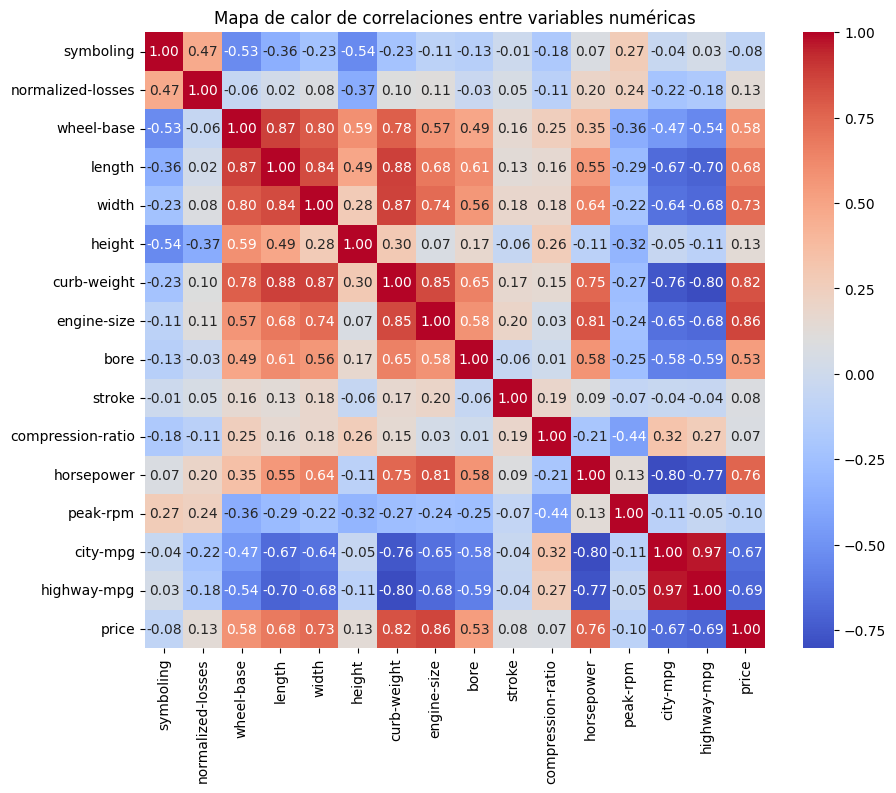

In [34]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_columns].corr()

# Graficar el heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Mapa de calor de correlaciones entre variables numéricas')
plt.show()

El tamaño del motor y el peso del vehículo tienen una correlación muy clara con el precio.
El costo para los seguros por reparación no tiene una correlación con el precio.


Parte 2: Preparación de Datos

 2. Preprocesamiento:
 * Selección de características importantes.

In [35]:
#Selección de características importantes.
price_corr = correlation_matrix['price'].sort_values(ascending=False)
# Filtrar correlaciones mayores a 0.5
price_corr_filtered = price_corr[price_corr > 0.5]
print(price_corr_filtered)



price          1.000000
engine-size    0.861752
curb-weight    0.820825
horsepower     0.757917
width          0.728699
length         0.682986
wheel-base     0.583168
bore           0.532300
Name: price, dtype: float64


In [36]:
numeric_features = ['engine-size','curb-weight','horsepower','width','length','wheel-base','bore']
categorical_features = ['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels']

In [37]:
# Obtener las columnas que son de tipo 'object' (categóricas)
categorical_columns = df.select_dtypes(include=['category']).columns
print(categorical_columns)

Index(['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'],
      dtype='object')


* Transformación de variables categóricas.
* División del conjunto de datos en entrenamiento y prueba.
* Escalado de características.

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
# Definir las características numéricas y categóricas
numeric_features = ['engine-size', 'curb-weight', 'horsepower', 'width', 'length', 'wheel-base', 'bore']
categorical_features = ['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels']


In [40]:
# Separar variables predictoras y objetivo
selected_features = numeric_features + categorical_features
X = df[selected_features]
y = df['price']

In [41]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [42]:
# Crear el preprocesador con OneHotEncoder para características categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Mantiene las columnas numéricas sin cambios
)

In [43]:
# Aplicar el preprocesamiento al conjunto de entrenamiento y prueba
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [44]:
# Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)


# Parte 3: Modelos de Regresión
3. Regresión Lineal:

* Entrenamiento del modelo.
* Evaluación del rendimiento (MSE y R²).

In [46]:
from sklearn.linear_model import LinearRegression
# Regresion lineal con 5 hyper parámetros
model = LinearRegression(
    fit_intercept= True,      # Si se debe calcular el intercepto
    #normalize = 'deprecated', # Normalizar los datos, opcion deprecada
    copy_X=True,              # Si se debe hacer una copia de X
    n_jobs=None,              # Numero de procesadores a utilizar. None es usar uno
    positive=False            # Si se deben forzar los coeficientes para que sea positivos
)
# El modelo tiene diferentes tipos de parámetros(?) o de funciones.
# fit es el entrenamiento (en standard scaler, one hor encoder o cualquier otro modelo que puedan transformar los datos es entrenamiento)
# Se deben notar que le pasamos las entradas y las salidas que deben tener, x es entrada, y es salida. Son entradas y salidas para el entrenamiento.
# El resultado es un modelo entrenado.
model.fit(X_train_scaled, y_train)

# Cuando el modelo ya fue entrenado, lo ponemos a predecir.
# Aqui solo le pasamos la entrada. La salida es el resultado a predecir.
y_pred = model.predict(X_test_scaled)

print("Coeficiente del modelo:", model.coef_)
print("Intercepto del modelo:",model.intercept_)

Coeficiente del modelo: [-5.80463399e+15 -5.80463399e+15  2.23600266e+15  2.23600266e+15
 -3.80651754e+17 -3.80651754e+17 -4.25968230e+16 -3.82375502e+16
 -1.08927418e+17 -1.15921266e+17 -7.50520220e+16  6.47782518e+15
  1.74028088e+16  1.71564472e+16  2.88715533e+03  1.55621958e+03
  2.39183952e+02  1.74971317e+03  3.00858505e+02  2.01050721e+02
 -1.13254700e+03]
Intercepto del modelo: 13311.336959658367


In [47]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluar el rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")


Error Cuadrático Medio (MSE): 25681708.763063647
Coeficiente de Determinación (R²): 0.6258254031114083


4. K-Nearest Neighbors (KNN):

Entrenamiento del modelo.
Evaluación del rendimiento (MSE y R²).

In [81]:
# Entrenamiento del modelo KNN
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')

Error Cuadrático Medio: 26334147.011181243
R-cuadrado: 0.6163195785287694


In [56]:
from sklearn.model_selection import cross_val_score

# Probar diferentes valores de K
k_values = list(range(1, 21))
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(scores.mean())

# Seleccionar el K con el menor MSE
best_k = k_values[mse_scores.index(max(mse_scores))]
print(f'Mejor valor de K: {best_k}')

Mejor valor de K: 4


Pero

K=16 tiene un 𝑅2 de 0.58 y un MSE de 28,522,357.

k=4 tiene un 𝑅2 de 0.46 y un MSE de 36,740,070.

Porque 4 es mejor?

5. Árbol de Decisión:

Entrenamiento del modelo.
Evaluación del rendimiento (MSE y R²).

In [68]:
from sklearn.tree import DecisionTreeRegressor
# Entrenamiento del modelo Árbol de Decisión
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = tree.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')

Error Cuadrático Medio: 7034098.3963028705
R-cuadrado: 0.8975153500807265


Parte 4: Benchmarking y Comparación de Modelos

 6. Comparación de Modelos:

Comparar los resultados de los tres modelos en términos de MSE y R².
Discusión sobre las diferencias en el rendimiento de los modelos.

| Comparación            | Arbol        | KNN(12)      | Regresión Lineal |
|------------------------|--------------|--------------|------------------|
| Error Cuadrático Medio | **7034098.396**  | 26334147.01  | 25681708.76      |
| R-cuadrado             | **0.8975153501** | 0.6163195785 | 0.6258254031     |


Tareas Adicionales y Desafíos

 8. Desafíos Adicionales:

    * Optimización de Modelos: Usar GridSearchCV para optimizar los hiperparámetros de KNN y el Árbol de Decisión.

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree_params = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tree_grid = GridSearchCV(tree, tree_params, scoring='r2', cv=5)
tree_grid.fit(X_train_scaled, y_train)
print(f'Mejor configuración para Árbol de Decisión: {tree_grid.best_params_}, Mejor score: {tree_grid.best_score_}')


Mejor configuración para Árbol de Decisión: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}, Mejor score: 0.7992760173568254


In [84]:
knn = KNeighborsRegressor()
knn_params = {'n_neighbors': range(1, 21)}
knn_grid = GridSearchCV(knn, knn_params, scoring='r2', cv=5)
knn_grid.fit(X_train_scaled, y_train)
print(f'Mejor K para KNN: {knn_grid.best_params_}, Mejor score: {knn_grid.best_score_}')


Mejor K para KNN: {'n_neighbors': 4}, Mejor score: 0.6742378384714337


*   Feature Engineering: Crear nuevas características basadas en las existentes para mejorar el rendimiento del modelo.

In [89]:
# Crear nuevas características basadas en las existentes
df['engine_horsepower_interaction'] = df['engine-size'] * df['horsepower']
df['curb_weight_length_interaction'] = df['curb-weight'] * df['length']

# Crear la nueva característica dividiendo horsepower por curb-weight
df['horsepower_curb_weight_ratio'] = df['horsepower'] / df['curb-weight']

# Verificar las primeras filas del DataFrame con las nuevas características
print(df[['engine_horsepower_interaction', 'curb_weight_length_interaction','horsepower_curb_weight_ratio']].head())

   engine_horsepower_interaction  curb_weight_length_interaction  \
0                        14430.0                        430102.4   
1                        14430.0                        430102.4   
2                        23408.0                        483297.6   
3                        11118.0                        412714.2   
4                        15640.0                        498718.4   

   horsepower_curb_weight_ratio  
0                      0.043564  
1                      0.043564  
2                      0.054552  
3                      0.043646  
4                      0.040722  



* Validación Cruzada: Implementar validación cruzada para evaluar la estabilidad de los modelos.

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Definir los modelos
#knn = KNeighborsRegressor(n_neighbors=5)
#tree = DecisionTreeRegressor(max_depth=5)

# Realizar validación cruzada para KNN
knn_scores = cross_val_score(knn, X_train_scaled, y_train, scoring='r2', cv=5)
print(f'Validación cruzada KNN (R²): {knn_scores.mean()}')

# Realizar validación cruzada para el Árbol de Decisión
tree_scores = cross_val_score(tree, X_train_scaled, y_train, scoring='r2', cv=5)
print(f'Validación cruzada Árbol de Decisión (R²): {tree_scores.mean()}')


Validación cruzada KNN (R²): 0.6566901368751538
Validación cruzada Árbol de Decisión (R²): 0.708925462832868
